# 📊 Final Assessment: Telco Customer Analysis Project

## 🧾 Objective
This notebook walks through a full data science pipeline on the **Telco Customer Churn dataset**, covering regression, classification, and unsupervised learning tasks - [Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)

## 🧾 Deliverables
 - A full data science pipeline showing:
      - EDA
      - Feature Engineering (if applicable)
      - Model building  - Regression, Classification and Unsupervised learning task (Clustering)
 - A section on business insights and recommendations based on analysis
 - A github link to the project

### **🚨Deadline**
**Thursday 10th July, 2025, Time: 10pm**

## 1️⃣ Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC #what is SVC used for?
from sklearn.tree import DecisionTreeClassifier #
from lightgbm import LGBMClassifier #
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle #


import warnings
warnings.filterwarnings("ignore")

## 2️⃣ Load the Dataset

In [ ]:
data = pd.read_csv("/content/Telco_Customer_Churn.csv")
data.head() #to see a preview of our data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking the size of our data
data.shape

(7043, 21)

## 3️⃣ Data Cleaning & Preprocessing
- Check missing values and data types
- Encode categorical variables
- Scale numeric features

In [ ]:
#checking the size of our data
data.shape

(7043, 21)

In [ ]:
#checking the column data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#statistic summary
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#checking for missing values
data.isnull().sum()
#this counts the number of nulls in each column

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Result: There are no missing values in our dataset

In [ ]:
#checking for duplicate rows
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
print(data.duplicated().sum())

0


Result: There are no duplicate rows in our dataset

In [ ]:
#checking the count of unique values in each column
data.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Exploring my data columns:

- 'customerID' unique values all through, that means a total of 7043 unique customers. Doesn't give an relavant insight and can be dropped.
- 'gender' is male or female
- 'SeniorCitizen'
- 'Partner'
- 'Dependents'

All the above are customer related characteristics.

---

The following refer to services offered by the Telco to customers
- 'PhoneService' - is either yes or no
  - 'MultipleLines' - can be yes, no or no phone service; is dependent on phone service. If phone service is no, then multiple lines is no phone service
- 'InternetService'
  - 'OnlineSecurity' - related to InternetService
  - 'OnlineBackup'- related to InternetService
  - 'DeviceProtection' - related to InternetService
  - 'TechSupport' - related to InternetService
  - 'StreamingTV'
  - 'StreamingMovies'


---


  Other parameters
-  'tenure'- refers to the duration relationship a customer has with the Telco. Number of months the customer has stayed with the company.
- 'Contract': The contract term of the customer (Month-to-month, One year, Two year)
- 'PaperlessBilling', yes or no
- 'PaymentMethod' - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- 'TotalCharges'- The total amount charged to the customer. *Should be related to 'MonthlyCharges'.For the entire duration? Could this be related to 'tenure'?*

---
Target variables
- 'MonthlyCharges'- The amount charged to the customer monthly. *Target for Regression.*
- 'Churn' - Whether the customer churned or not (Yes or No). *Target for Classification.*

Task 2:
Segment Customers

In [ ]:
#At a closer look, 'TotalCharges' shouldn't be an object dtype but numerical
#Fixing the 'TotalCharges' dtype
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#would I want to fill up missing values on my data?
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Drop rows with NaN values that resulted from the conversion
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
data.shape

(7032, 21)

Result: the 'TotalCharges' column dtype has now been fixed.

At some point, I wanted the seniorcitizen to be a boolean instead of binary, but after further research, not anymore.

Tenure is counted in months and feels like a datetime dtype. Gemini however says it's best as a numerical feature. ok!

In [ ]:
#Drop the customerID column as it's not needed for modeling
data.drop('customerID', axis=1, inplace=True)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Encoding categorical features
#Use LabelEncoder for the following - ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling','Churn'] - because they'll result in binary
#Use OneHotEncoder for the following - ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'] - because they have more than 2 unique values

cat_binary = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','PaperlessBilling','Churn']

cat_onehot = ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

# Apply LabelEncoder to binary features
label_encoder = LabelEncoder()
for col in cat_binary:
    data[col] = label_encoder.fit_transform(data[col])

# Apply OneHotEncoder to other categorical features
data = pd.get_dummies(data, columns=cat_onehot, drop_first=True)

In [ ]:
#check
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#Scaling numerical features
#columns to be scaled - ['tenure', 'MonthlyCharges', 'TotalCharges']. I won't be scaling encoded features.

num_feat = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
data[num_feat] = scaler.fit_transform(data[num_feat])

display(data[num_feat].head(10))

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
5,-0.995040,1.158489,-0.645369
6,-0.424625,0.807802,-0.147313
7,-0.913552,-1.165018,-0.874169
8,-0.180161,1.329677,0.336516
9,1.205134,-0.287470,0.531476


In [ ]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
#Final check for data cleaning and preprocessing
print("Data cleaning and preprocessing complete! New shape:", data.shape)
data.head()

Data cleaning and preprocessing complete! New shape: (7032, 31)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,True,False


## 4️⃣ Exploratory Data Analysis (EDA)
- Summary statistics
- Visualize churn distribution
- Correlation heatmap
- Histograms and boxplots

In [ ]:
#checking the statistical distribution of our data set
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,-1.126643e-16,0.903299,0.592719,6.062651e-17,-1.119064e-16,0.265785
std,0.500014,0.368844,0.499729,0.457629,1.000071e+00,0.295571,0.491363,1.000071e+00,1.000071e+00,0.441782
min,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,0.000000,0.000000,-1.547283e+00,-9.990692e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,1.000000,0.000000,-9.709769e-01,-8.302488e-01,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.000000,1.000000,1.845440e-01,-3.908151e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.199259e-01,1.000000,1.000000,8.331482e-01,6.668271e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.000000,1.000000,1.793381e+00,2.824261e+00,1.000000


# *Univariate Distributions*

In [ ]:
#churn distribution
churn_counts = data["Churn"].value_counts()
churn_counts

,count
Churn,
0,5163
1,1869


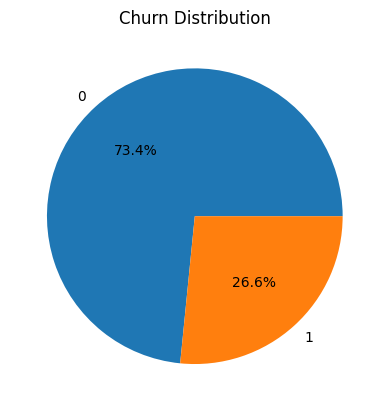

In [ ]:
#visualise churn distribution
churn = data["Churn"].value_counts()
plt.pie(churn, labels = churn.index, autopct = "%1.1f%%")
plt.title("Churn Distribution")
plt.show();

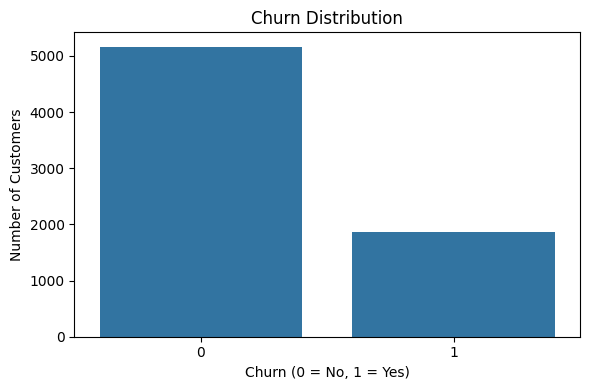

Churn Rate: 26.58%


In [ ]:
#still visualising churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data = data)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

#print churn rate for reference
churn_rate = data['Churn'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

#notice an imbalance in the churn distribution

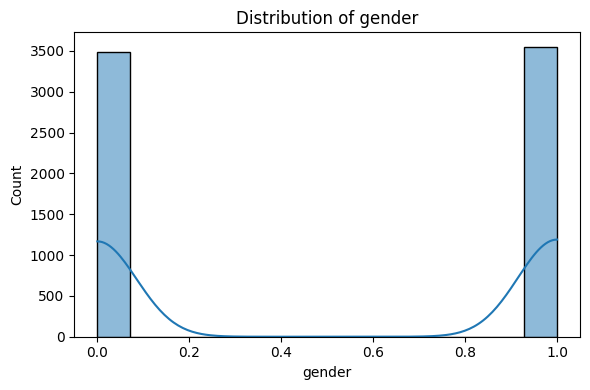

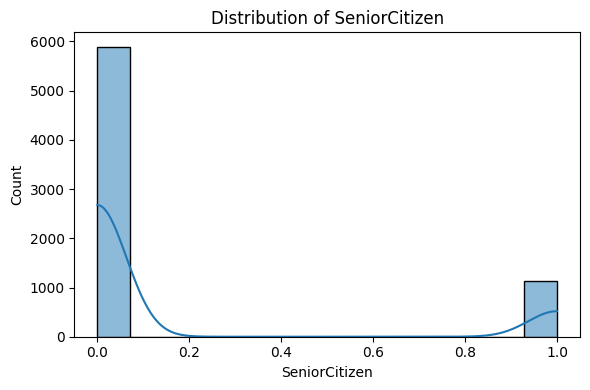

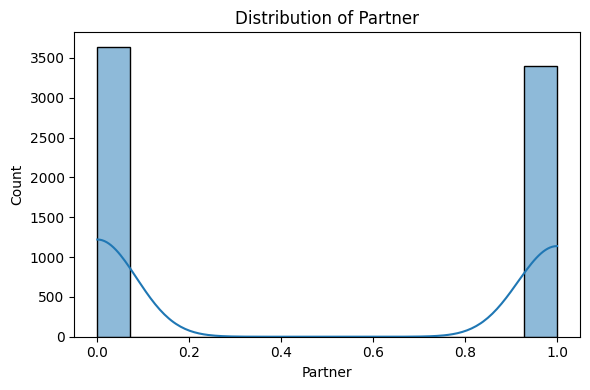

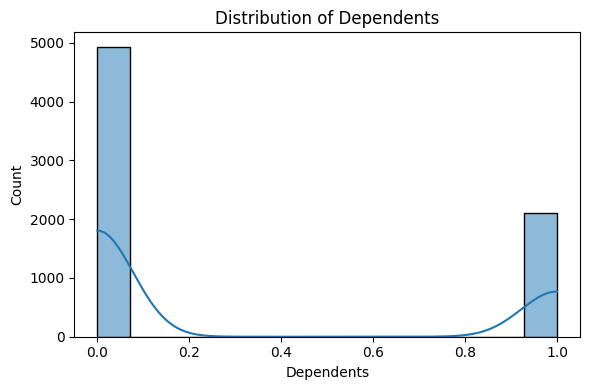

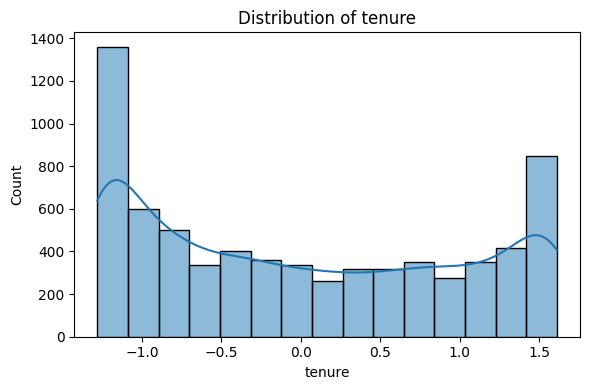

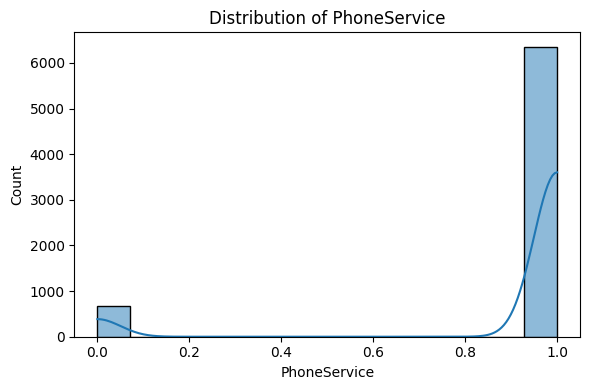

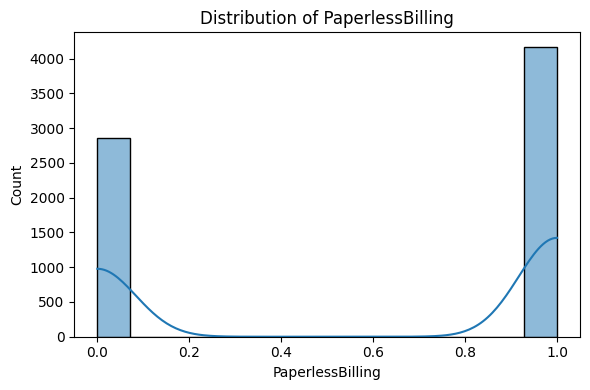

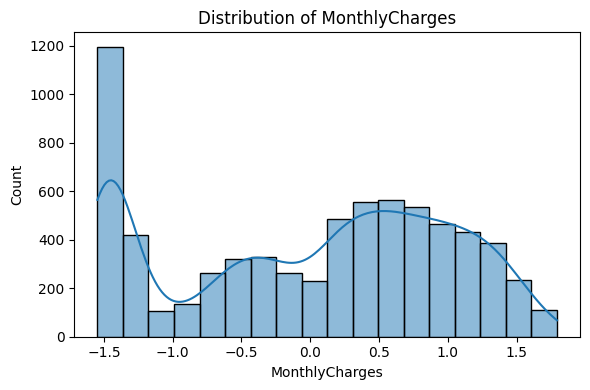

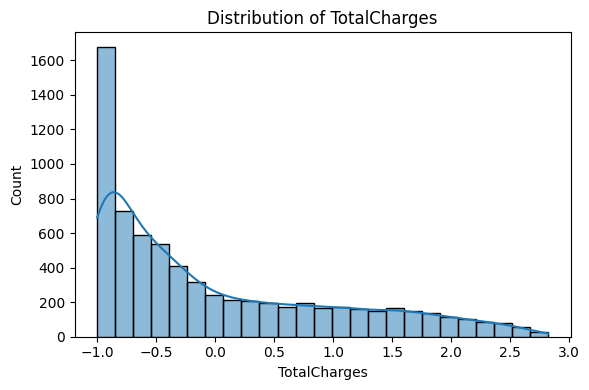

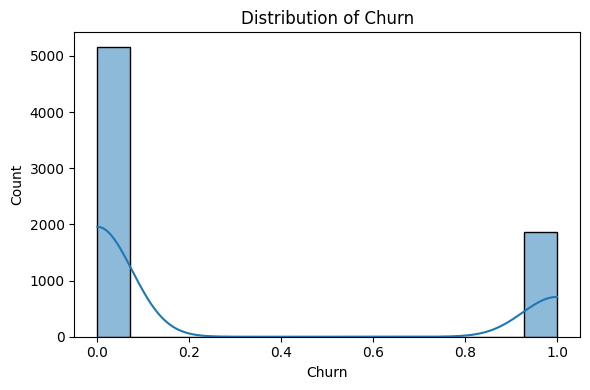

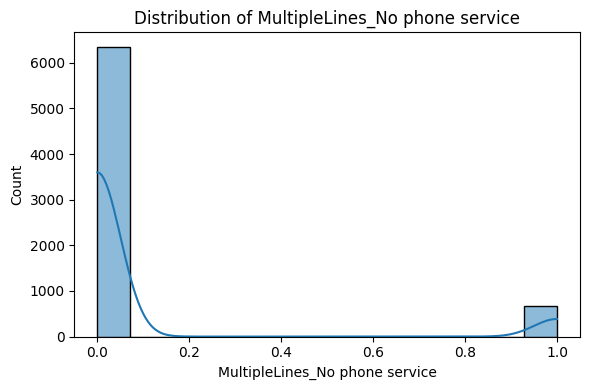

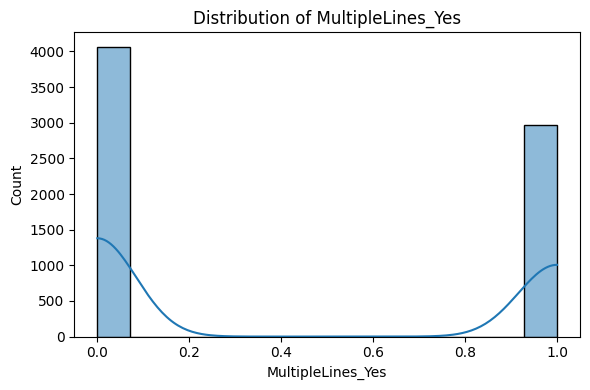

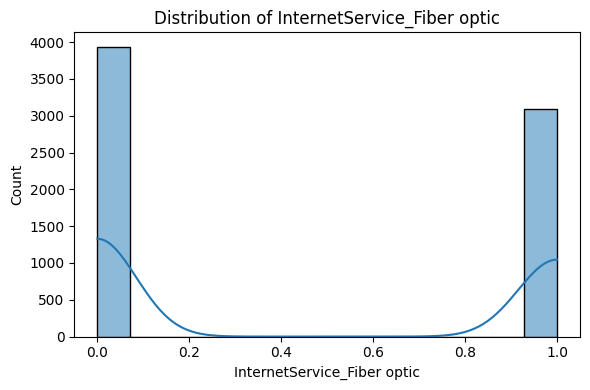

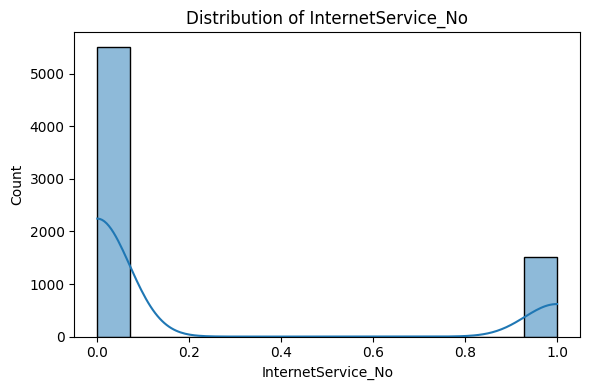

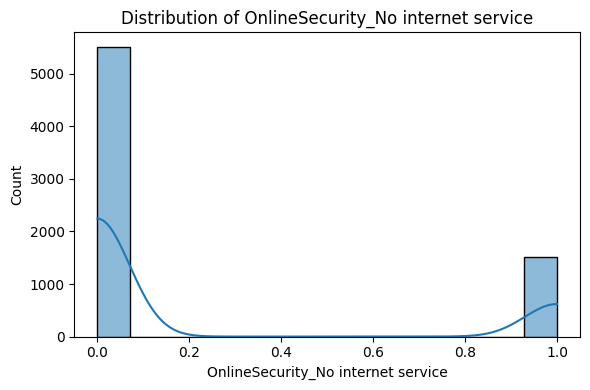

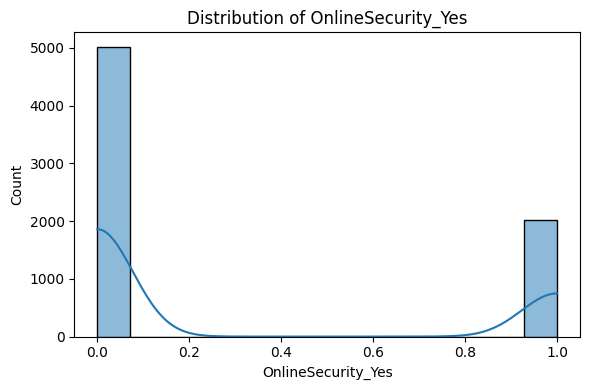

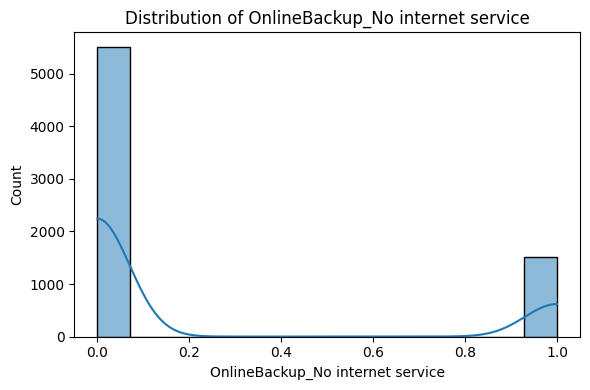

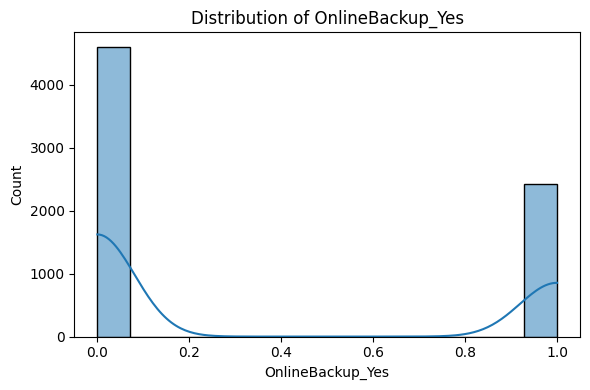

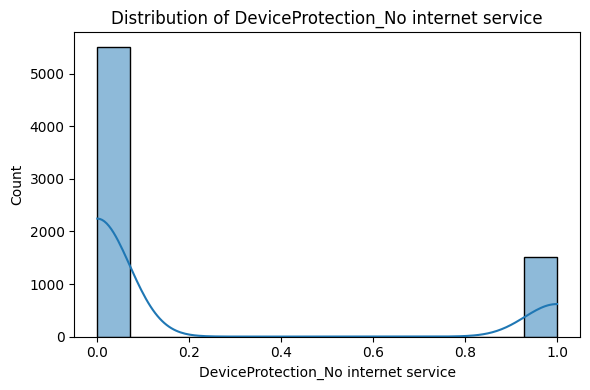

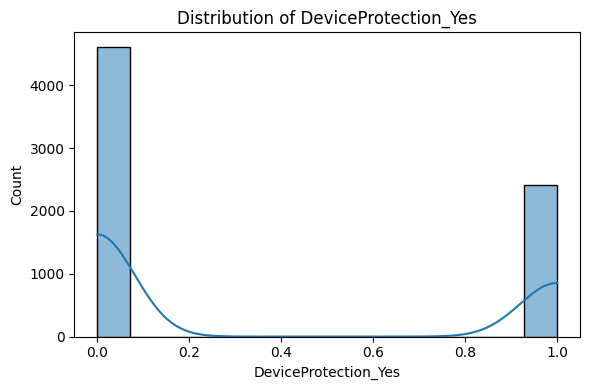

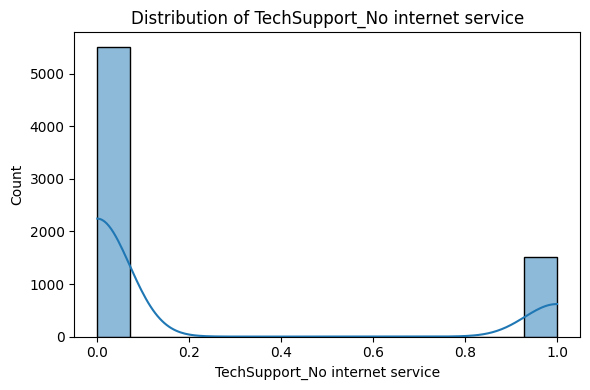

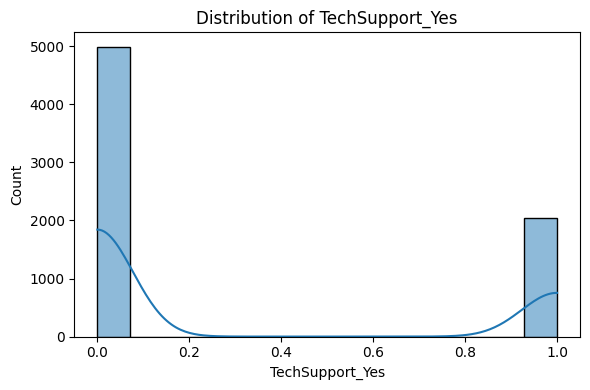

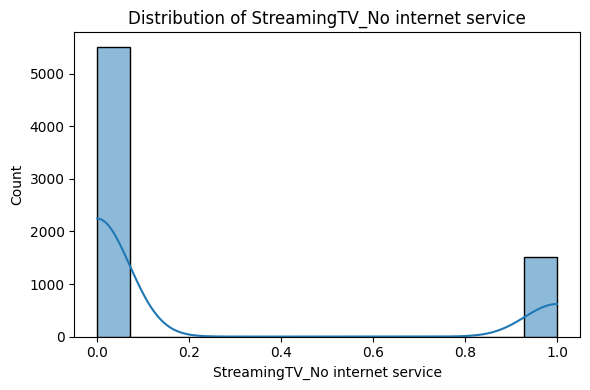

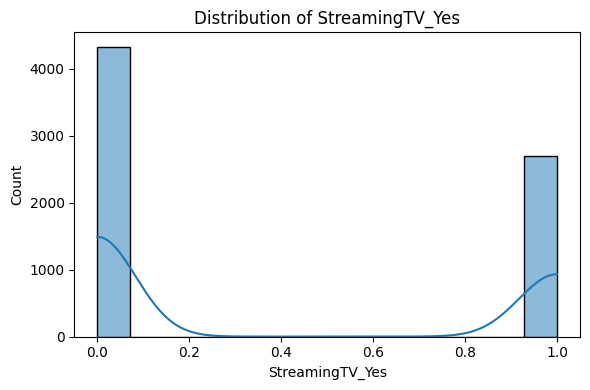

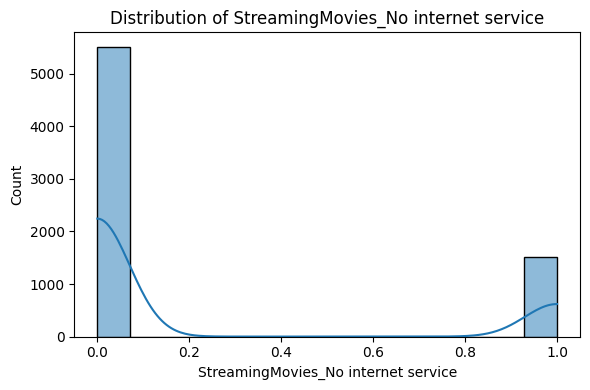

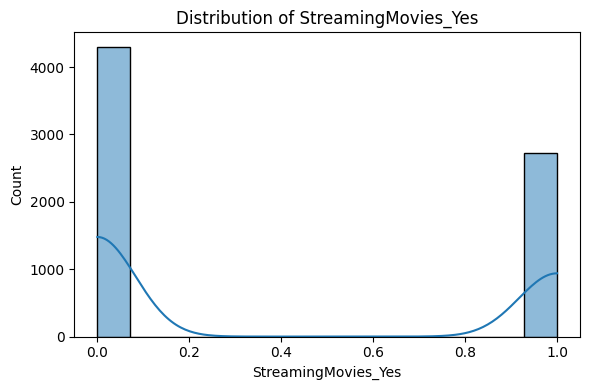

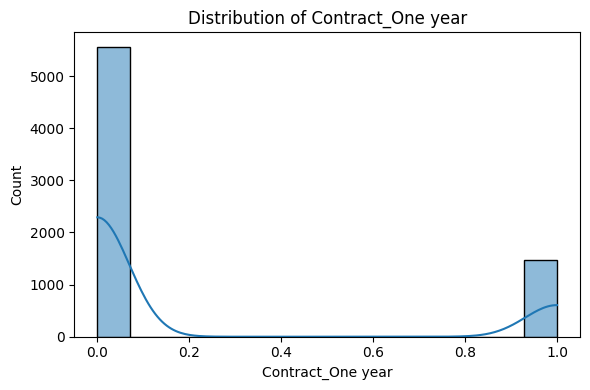

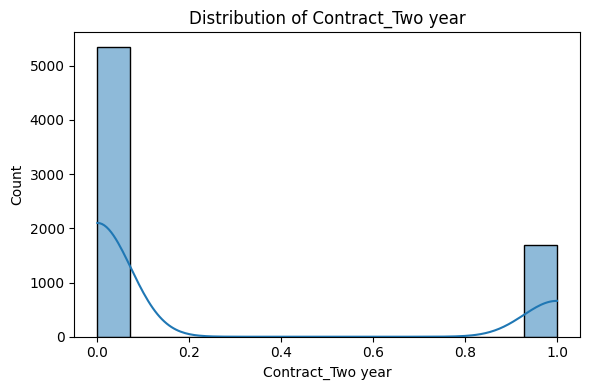

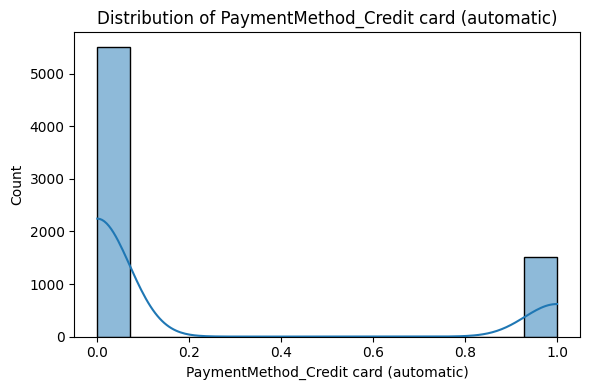

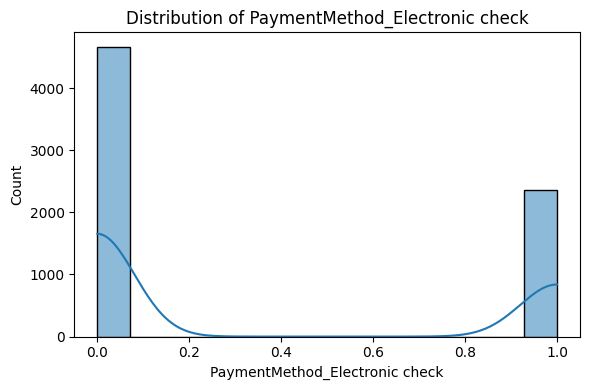

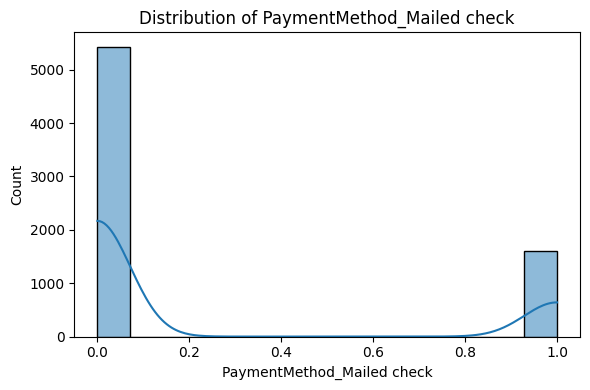

In [ ]:
#plotting a distribution for each of the columns
for col in data:
  plt.figure(figsize=(6, 4)) # Adjust the figure size here (width, height)
  sns.histplot(data[col], kde = True)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.show();

# *Multivariate distributions*

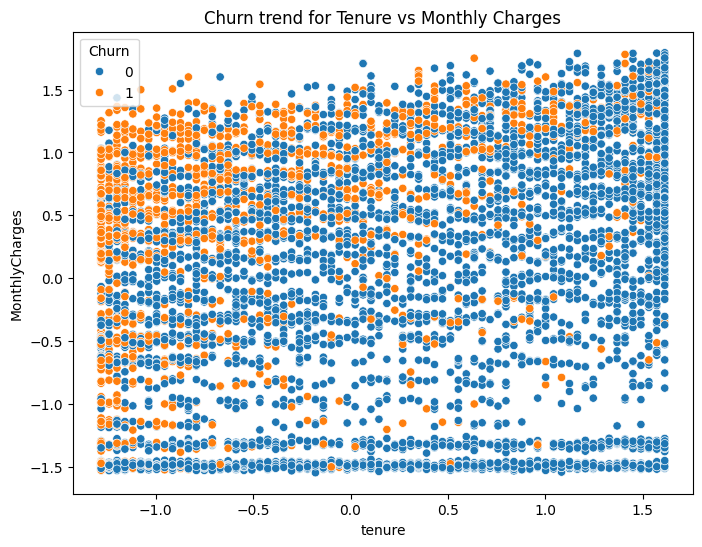

In [ ]:
#scatter plots
plt.figure(figsize=(8,6))
sns.scatterplot(data, x = "tenure", y = "MonthlyCharges", hue = "Churn")
plt.title("Churn trend for Tenure vs Monthly Charges")
plt.xlabel("tenure")
plt.ylabel("MonthlyCharges")
plt.show();

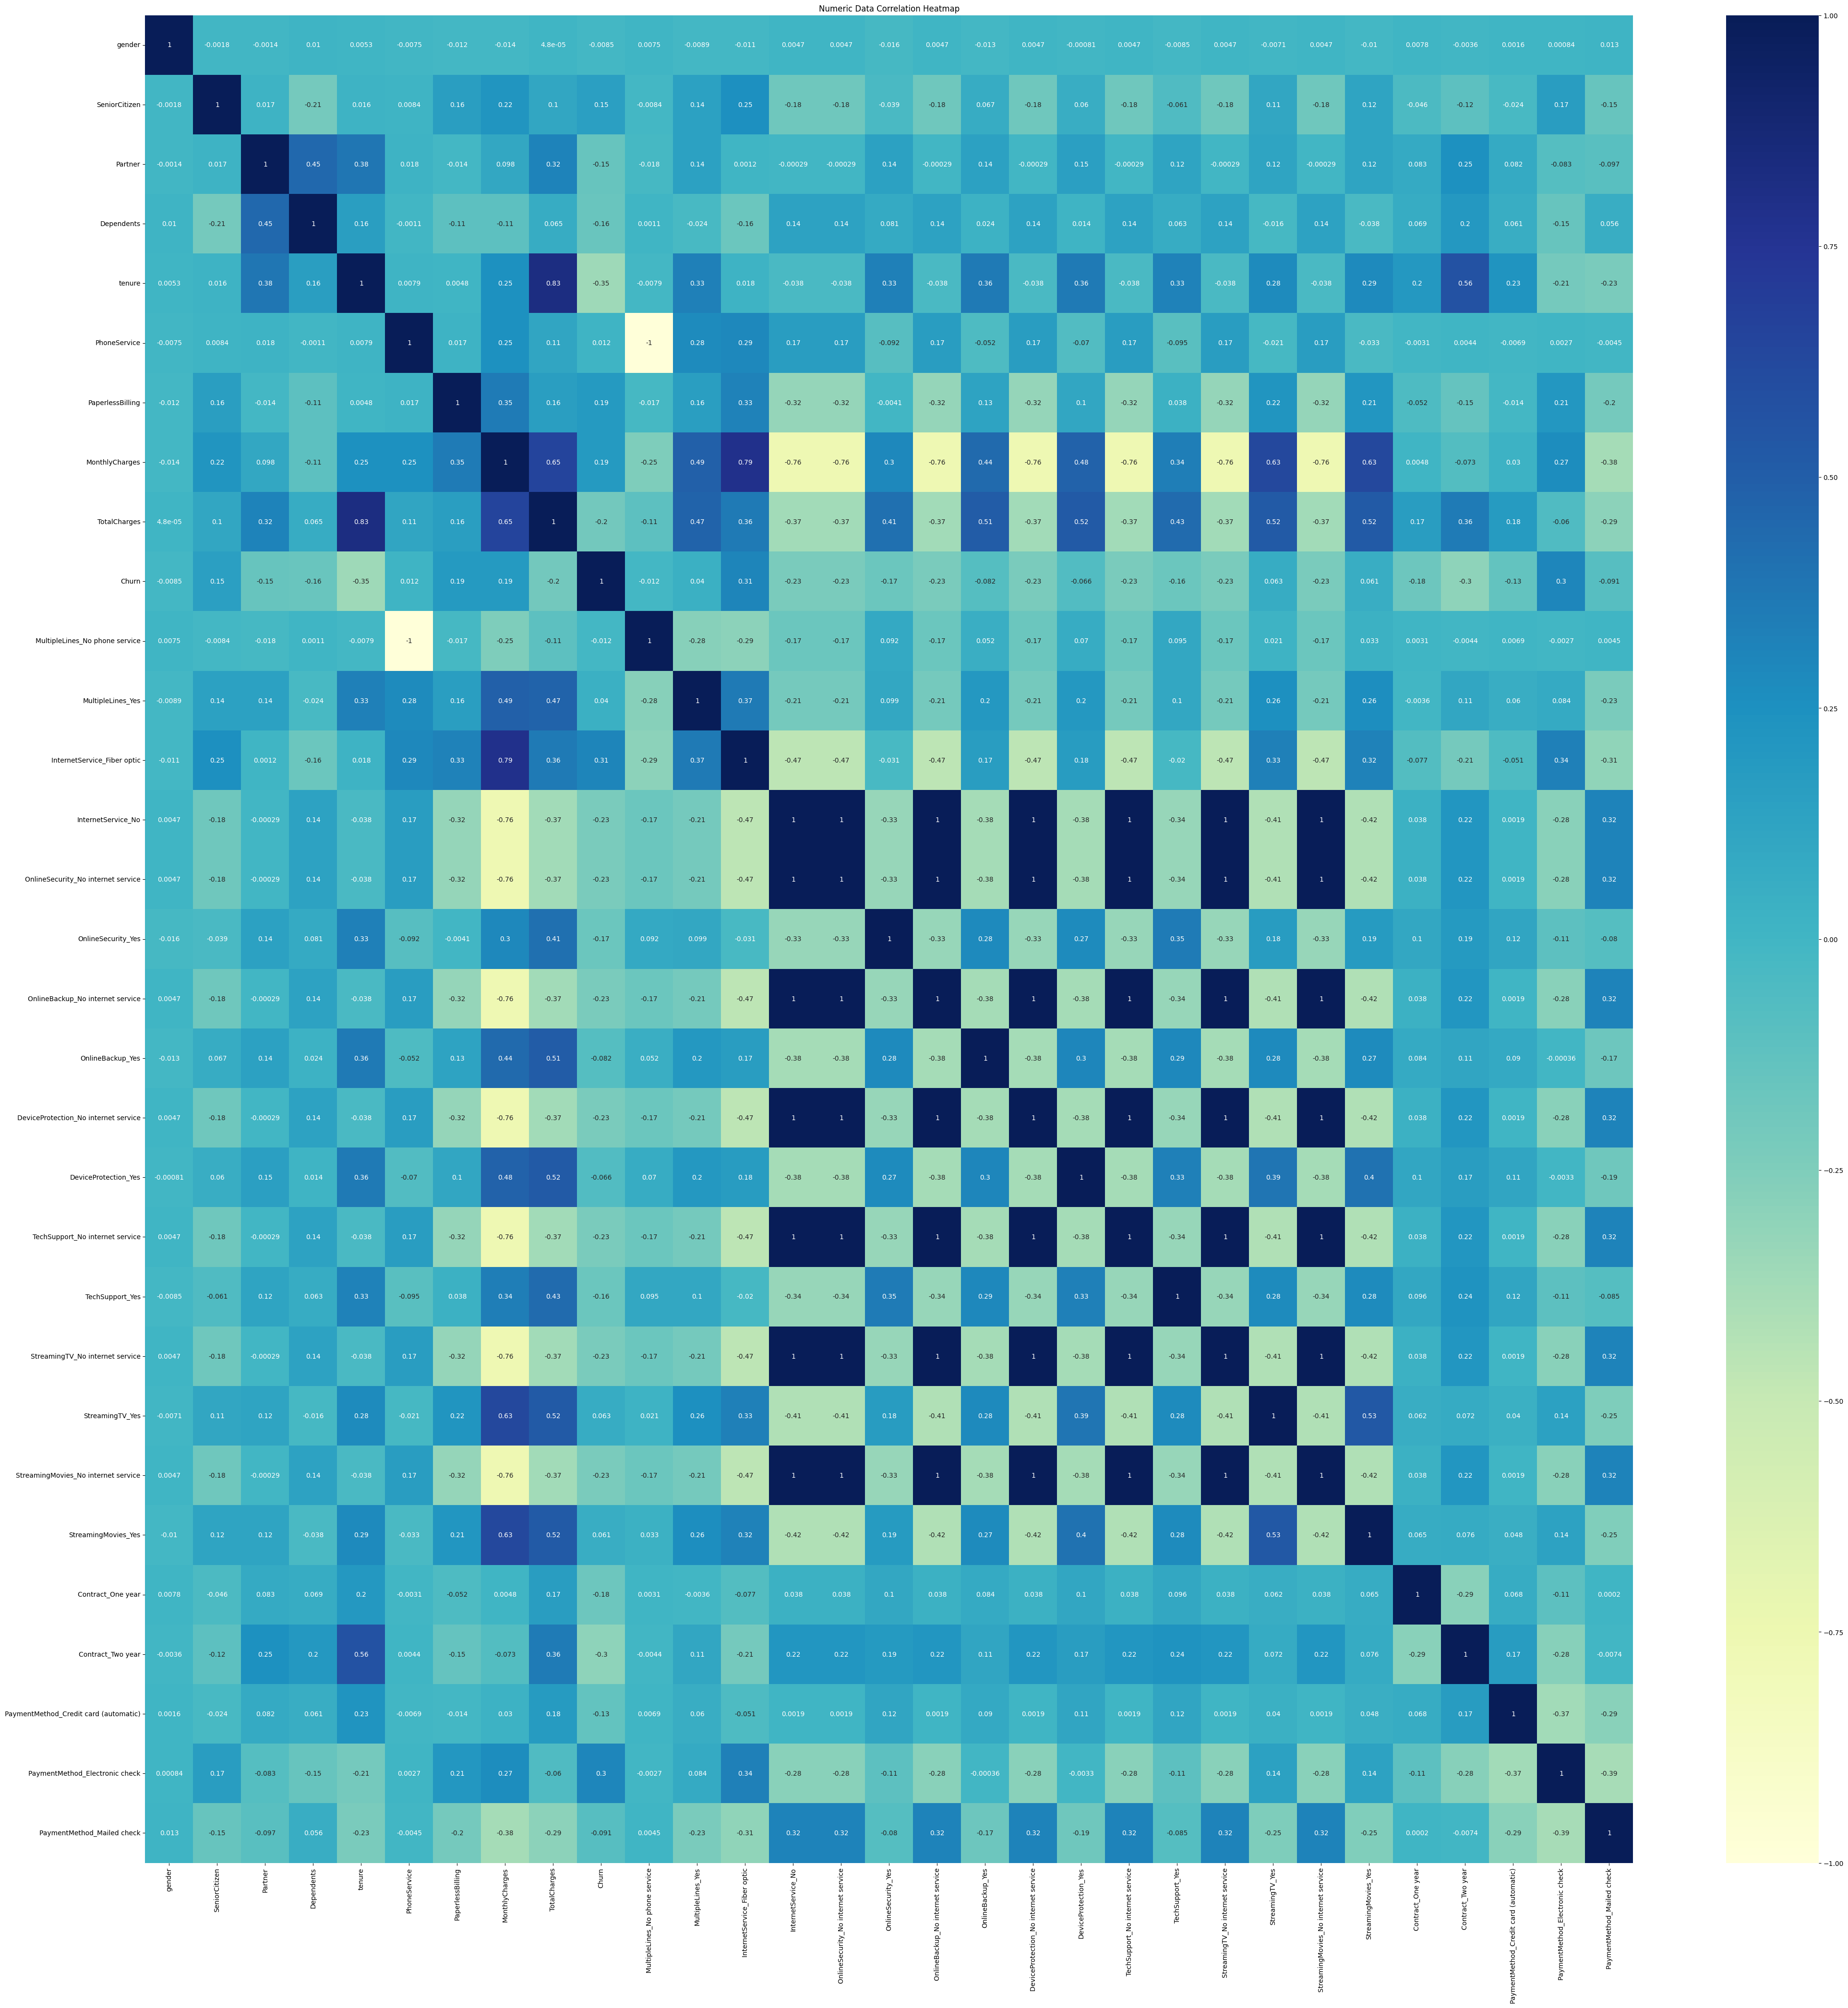

In [ ]:
#correlation heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.title("Numeric Data Correlation Heatmap")
plt.show()

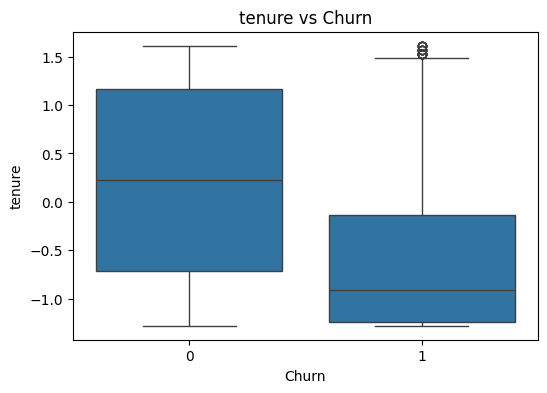

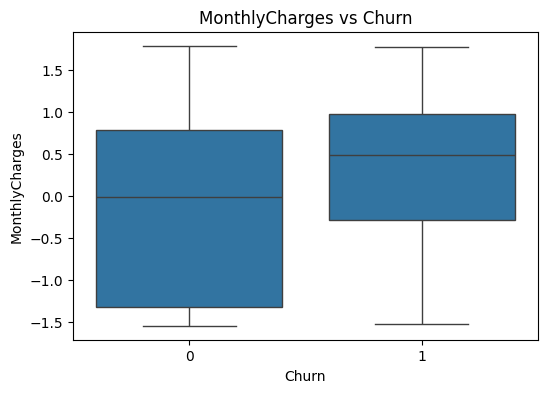

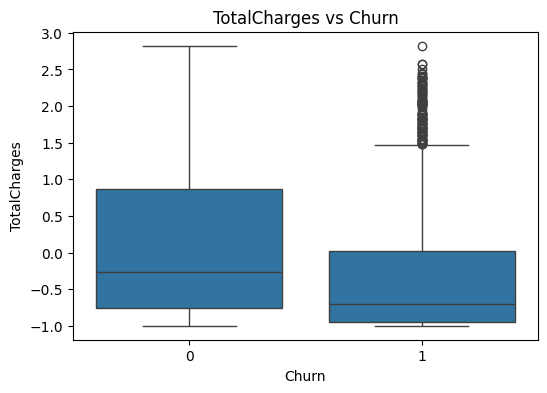

In [ ]:
#Boxplots to explore how features differ for churned vs. non-churned
for col in num_feat:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data = data)
    plt.title(f"{col} vs Churn")
    plt.show()

## 5️⃣ Regression Task: Predict Monthly Charges
- Target: `MonthlyCharges`
- Evaluation: MAE, RMSE, R²

In [ ]:
#Define features and target
X = data.drop("MonthlyCharges", axis = 1) #would only contain independent features(use for predicting the target)
y = data["MonthlyCharges"] #target variable

print(X.shape)

(7032, 30)


In [ ]:
#using train test split to split test and train data
#train - 80% and the test - 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 30)
(1407, 30)
(5625,)
(1407,)


In [ ]:
#model - linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#making predictions using the test independent variables
y_preds_lr = lr.predict(X_test)
y_preds_lr

array([-1.32657169, -1.32174043,  1.16367558, ..., -0.32740987,
        1.66491176, -1.32770499])

In [ ]:
#evaluation metrics for linear regression
mae_lr = mean_absolute_error(y_test, y_preds_lr)
print(f"Mean Absolute Error for Linear Regression Model: {mae_lr:.2f}")

rmse_lr = np.sqrt(mean_squared_error(y_test, y_preds_lr))
print(f"Root Mean Squared Error for Linear Regression Model: {rmse_lr:.2f}")

r2_lr = r2_score(y_test, y_preds_lr)
print(f"R-squared for Linear Regression Model: {r2_lr:.2f}")

Mean Absolute Error for Linear Regression Model: 0.03
Root Mean Squared Error for Linear Regression Model: 0.03
R-squared for Linear Regression Model: 1.00


In [ ]:
#model - Random Forest Regression
rf = RandomForestRegressor(random_state = 42) #why use the random_state here?
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#making prediction
y_preds_rf = rf.predict(X_test)
y_preds_rf

array([-1.33273264, -1.32287685,  1.1548658 , ..., -0.32740867,
        1.68082934, -1.32084918])

In [ ]:
#Evaluation metrics for Random Forest Regression
mae_rf = mean_absolute_error(y_test, y_preds_rf)
print(f"Mean Absolute Error for Random Forest Regression Model: {mae_rf:.2f}")

rmse_rf = np.sqrt(mean_squared_error(y_test, y_preds_rf))
print(f"Root Mean Squared Error for Random Forest Regression Model: {rmse_rf:.2f}")

r2_rf = r2_score(y_test, y_preds_rf)
print(f"R-squared for Random Forest Regression Model: {r2_rf:.2f}")


Mean Absolute Error for Random Forest Regression Model: 0.03
Root Mean Squared Error for Random Forest Regression Model: 0.04
R-squared for Random Forest Regression Model: 1.00


## 6️⃣ Classification Task: Predict Churn
- Target: `Churn`
- Use Logistic Regression & Random Forest
- Evaluation: Confusion Matrix, F1 Score, ROC-AUC

In [ ]:
#Define features and target
X = data.drop("Churn", axis = 1) #independent features
y = data["Churn"] #target

X.shape

(7032, 30)

In [ ]:
#Churn distribution
print("Churn counts:\n", churn_counts)
print("Churn rate =", churn_rate)
churn_percentage = data['Churn'].value_counts(normalize=True) * 100
print("\nChurn percentage:\n", churn_percentage)
#imbalance in churn

Churn counts:
 Churn
0    5163
1    1869
Name: count, dtype: int64
Churn rate = 26.578498293515356

Churn percentage:
 Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [ ]:
#apply SMOTE to balance churn classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print(churn_counts)
print(y_resampled.value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64
Churn
0    5163
1    5163
Name: count, dtype: int64


In [ ]:
#split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
#model - LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#logreg predictions
y_preds_logreg = logreg.predict(X_test)
y_preds_logreg
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

In [ ]:
#model - Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#rfc predictions
y_preds_rfc = rfc.predict(X_test)
y_preds_rfc
y_proba_rfc = rfc.predict_proba(X_test)[:, 1]

In [ ]:
def evaluate_model(y_test, y_pred, y_proba, model_name):
    print(f"\n🔍 {model_name} Evaluation")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")


In [ ]:
#evaluate logistic regression model
evaluate_model(y_test, y_preds_logreg, logreg.predict_proba(X_test)[:, 1], "Logistic Regression")


🔍 Logistic Regression Evaluation
Confusion Matrix:
[[807 230]
 [185 844]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1037
           1       0.79      0.82      0.80      1029

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

ROC-AUC Score: 0.88


In [ ]:
# Evaluate Random Forest model
evaluate_model(y_test, y_preds_rfc, y_proba_rfc, "Random Forest Classifier")


🔍 Random Forest Classifier Evaluation
Confusion Matrix:
[[849 188]
 [158 871]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1037
           1       0.82      0.85      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

ROC-AUC Score: 0.91


In [ ]:
print(y_resampled.value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


## 7️⃣ Clustering Task: Segment Customers
- Use KMeans
- Apply PCA for visualization
- Evaluate with Silhouette Score

In [ ]:
#drop the target variable for clustering
X_cluster = data.drop("Churn", axis = 1)
X_cluster.shape

(7032, 30)

In [ ]:
#optional: apply PCA for visualisation only (not required for clustering)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)
X_pca

array([[-1.45775983, -1.24895214],
       [-0.28230669, -0.09494886],
       [-1.09887871, -1.30631075],
       ...,
       [-1.30114132, -0.81737492],
       [-0.53993577, -1.52198502],
       [ 2.85703571,  0.84484567]])

In [ ]:
#try KMeans with a range of cluster numbers to find the optimal k
s_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    s_scores.append(score)

s_scores

[np.float64(0.23508154502478218),
 np.float64(0.28409977982660817),
 np.float64(0.22777312049753212),
 np.float64(0.2058715369095406),
 np.float64(0.18606926027270074),
 np.float64(0.18189818330082874),
 np.float64(0.14570382489615213),
 np.float64(0.14605317993015554),
 np.float64(0.14596694282148553)]

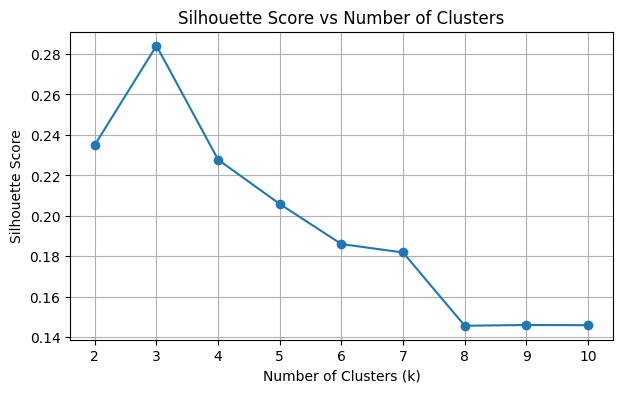

In [ ]:
#plot silhouette scores
plt.figure(figsize=(7, 4))
plt.plot(k_range, s_scores, marker = 'o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
#choose optimal k - 3 or 4 based on plot
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state = 42)
clusters = kmeans.fit_predict(X_cluster)

In [ ]:
clusters

array([2, 2, 2, ..., 2, 3, 0], dtype=int32)

In [ ]:
#Add cluster labels to data
data["Cluster"] = clusters
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,True,False,2
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,True,False,False,False,True,2
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,True,2
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,False,False,False,False,True,False,False,False,False,2
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,True,False,3


In [ ]:
data["Cluster"].value_counts()

,count
Cluster,
0,2030
3,1867
2,1615
1,1520


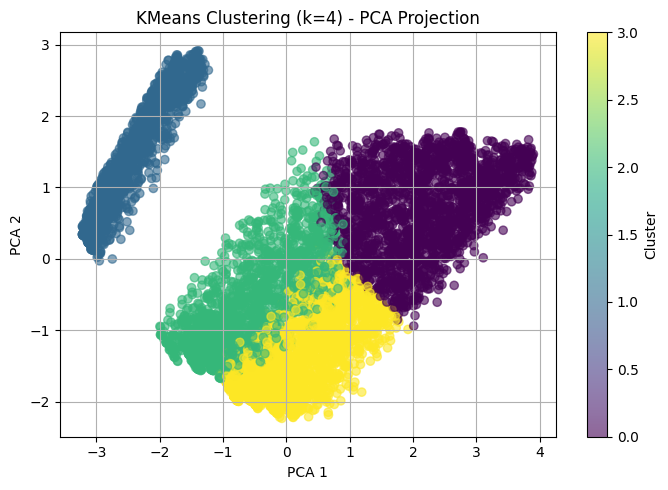

In [ ]:
#visualise clusters using PCA components
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f"KMeans Clustering (k={optimal_k}) - PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Final silhouette score
final_score = silhouette_score(X_cluster, clusters)
print(f"Final Silhouette Score for k={optimal_k}: {final_score:.2f}")

Final Silhouette Score for k=4: 0.23


## 8️⃣ Business Insights & Recommendations
- Summarize what each model learned
- Recommend actions for the telecom business

### Business Insights and Recommendations

---

### Regression Model (Predicting Monthly Charges)

The regression model revealed key drivers of higher MonthlyCharges:

- Fiber optic internet service
- Subscriptions to StreamingTV and StreamingMovies
- Month-to-month contract types

Customers with longer tenure tend to pay slightly less, possibly due to legacy pricing or loyalty discounts.

**Business Implications:**

- High revenue customers should be prioritized for exclusive bundles and loyalty programs to sustain profitability.
- Use predicted charges to forecast revenue and support tailored marketing offers based on usage patterns.

---

### Classification Model (Churn Prediction)

The churn rate was approximately 26.6%. Logistic Regression and Random Forest models showed that churn is most influenced by:

- Month-to-month contracts
- Lack of tech support or security add-ons
- Electronic check as payment method
- Short customer tenure

**Business Implications:**

- Offer discounts and value bundles to short-tenure and month-to-month customers to increase commitment.
- Encourage stable payment methods (e.g., auto-pay) through incentives.
- Integrate churn prediction into CRM tools to proactively flag and retain at-risk customers.

---

### Clustering (Customer Segmentation)

KMeans and PCA identified 4 customer segments based on tenure, contract type, service usage, and charges. These included:

- Segment A: Long-tenure, low-churn customers — highly loyal
- Segment B: Short-tenure, high-charge customers — high value but high risk
- Other segments vary in service combinations and churn patterns

**Business Implications:**

- Reward Segment A with loyalty perks to reinforce retention.
- Target Segment B with bundled offerings to increase satisfaction and reduce churn.
- Tailor marketing communication by segment characteristics for better engagement and conversion.

---

### Strategic Action Plan

| Area              | Recommended Action                                                                 |
|-------------------|------------------------------------------------------------------------------------|
| Retention         | Proactively engage churn-prone users with personalized offers and contract incentives. |
| Billing Stability | Promote stable payment methods via auto-pay discounts or smoother onboarding.      |
| Service Bundling  | Design custom bundles combining popular services like streaming and tech support.  |
| Segmentation      | Use clusters to tailor messaging and offerings for each customer profile.          |
| Monitoring & Ops  | Create dashboards that track churn signals by tenure, contract type, and services. |

---

### Conclusion and Next Steps

The models developed in this analysis provide actionable insights into customer behavior and risk:

- Regression helps identify and forecast high-value customers
- Classification detects churn-prone users early
- Clustering enables precision marketing through customer segmentation

**Next Step:** Integrate these insights into CRM and marketing systems to enhance customer retention, increase profitability, and drive customer lifetime value.


## ✅ Optional Bonus
- Deploy a simple model using Streamlit (outside this notebook)
- Export this notebook to PDF